# Polynomial Linear Regression

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv')
x = dataset[['Salnty']].iloc[:1000,:].values
y = dataset[['T_degC']].iloc[:1000,:].values

## Taking care of missing data

In [3]:
from sklearn.impute import SimpleImputer
x_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = x_imputer.fit_transform(x)

In [4]:
y_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = y_imputer.fit_transform(y)

## Splitting the data into training and test sets

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Adding polynomial features

In [6]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.transform(x_test)

## Training the model

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_poly, y_train)

LinearRegression()

## Testing the model

In [8]:
y_pred = regressor.predict(x_test_poly)
print(np.concatenate((y_pred, y_test), 1))

[[ 6.72957561  7.76      ]
 [10.26343621 13.57      ]
 [ 7.37030279  7.91      ]
 [11.59403099 12.5       ]
 [ 9.34959459  3.51      ]
 [ 1.84243503  4.3       ]
 [ 4.6185513   4.72      ]
 [10.97800066  9.83      ]
 [ 5.24507082  4.53      ]
 [11.29363704 12.46      ]
 [ 4.11092449  4.5       ]
 [11.53430761 12.19      ]
 [ 5.51408323  5.09      ]
 [ 7.53510327  5.13      ]
 [ 6.29514012  4.65      ]
 [ 3.79135138  3.99      ]
 [ 2.88382346  4.42      ]
 [ 4.36178112  3.88      ]
 [ 8.19727     8.76      ]
 [ 8.2185676   7.58      ]
 [11.59867881  9.75      ]
 [ 9.28136021  9.21      ]
 [ 4.11092449  3.42      ]
 [11.55737565 11.5       ]
 [10.14018439 13.16      ]
 [ 4.34103943  4.19      ]
 [ 7.48053288  6.32      ]
 [11.02007088  9.02      ]
 [11.39059286 13.6       ]
 [10.47741551 10.46      ]
 [ 5.22563334  3.41      ]
 [11.2061976  10.41      ]
 [11.35316804 13.94      ]
 [ 3.89861678  3.84      ]
 [11.57330493 11.3       ]
 [11.26942605 13.13      ]
 [ 9.50476384  9.18      ]
 

## Visualizing the results

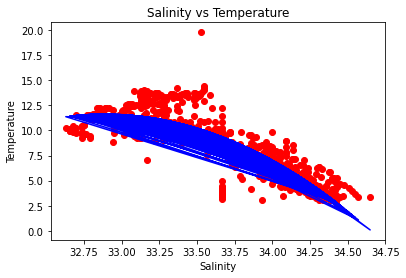

In [9]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train_poly), color='blue')
plt.title('Salinity vs Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()

## Evaluating the model

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7478265184476538